<a href="https://colab.research.google.com/github/nexaca/my_colab_files/blob/main/TOASO_Hisse_Senedi_Analiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import the libraries - kütüphanelerin çağırılması
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime

In [4]:
#open a file  - google colab libraries - veri dosyasinin acilmasi
from google.colab import files
uploaded = files.upload()


Saving TOASO Historical Data.csv to TOASO Historical Data.csv


In [8]:
#Read CSV File - CSV dosyasindaki verilerin okunması
TOASO = pd.read_csv("TOASO Historical Data.csv")
TOASO

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 08, 2013",10.55,10.50,10.70,10.40,1.91M,0.96%
1,"Jan 09, 2013",10.85,10.55,10.85,10.45,1.61M,2.84%
2,"Jan 10, 2013",10.90,10.80,10.90,10.65,1.03M,0.46%
3,"Jan 11, 2013",10.75,10.90,10.90,10.70,585.49K,-1.38%
4,"Jan 14, 2013",10.95,10.80,11.00,10.75,823.87K,1.86%
...,...,...,...,...,...,...,...
1646,"Dec 25, 2020",31.96,32.20,32.46,31.66,965.37K,-0.68%
1647,"Dec 28, 2020",32.92,32.10,33.04,32.08,2.62M,3.00%
1648,"Dec 29, 2020",33.96,33.14,34.28,32.80,4.89M,3.16%
1649,"Dec 30, 2020",33.66,34.18,34.24,33.56,2.91M,-0.88%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


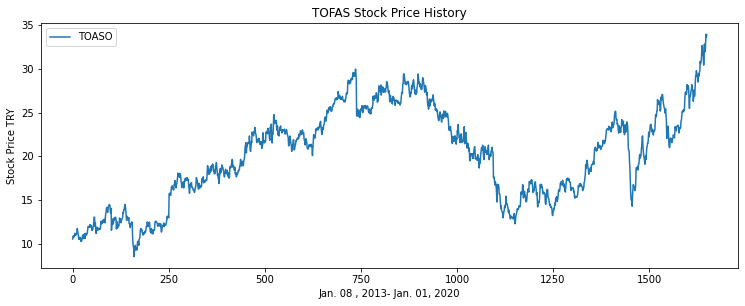

In [12]:
#VISUALIZE - VERİNİN GÖRSELLEŞTİRİLMESİ

plt.figure(figsize = (12.5,4.5))
plt.plot(TOASO['Price'], label = 'TOASO')
plt.title('TOFAS Stock Price History')
plt.xlabel('Jan. 08 , 2013- Jan. 01, 2020')
plt.ylabel('Stock Price TRY')
plt.legend(loc='top left')
plt.show()

In [14]:
# SMA-Simple Moving Average  - Basit Hareketli Ortalama 30 günlük periyod
SMA30 = pd.DataFrame()
SMA30['Price'] = TOASO['Price'].rolling(window=30).mean()
SMA30

,Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1646,30.135333
1647,30.313333
1648,30.550000
1649,30.768000


In [15]:
# SMA-Simple Moving Average  - Basit Hareketli Ortalama 100 günlük periyod
SMA100 = pd.DataFrame()
SMA100['Price'] = TOASO['Price'].rolling(window=100).mean()
SMA100

,Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1646,26.2168
1647,26.3170
1648,26.4234
1649,26.5254


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


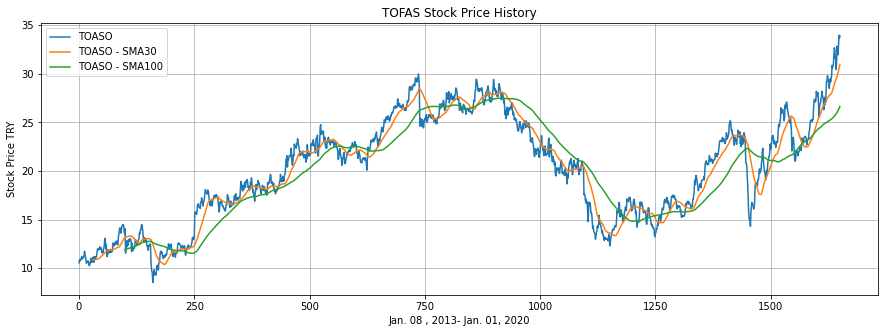

In [18]:
plt.figure(figsize = (15,5))
plt.grid()
plt.plot(TOASO['Price'], label = 'TOASO')
plt.plot(SMA30['Price'], label = 'TOASO - SMA30')
plt.plot(SMA100['Price'], label = 'TOASO - SMA100')
plt.title('TOFAS Stock Price History')
plt.xlabel('Jan. 08 , 2013- Jan. 01, 2020')
plt.ylabel('Stock Price TRY')
plt.legend(loc='top left')
plt.show()

In [20]:
#STORE DATA IN NEW DATAFRAME 
mid_dataset = pd.DataFrame()
mid_dataset['DATE'] = TOASO['Date']
mid_dataset['TOASO'] = TOASO['Price']
mid_dataset['SMA30'] = SMA30['Price']
mid_dataset['SMA100'] = SMA100['Price'] 
mid_dataset

,DATE,TOASO,SMA30,SMA100
0,"Jan 08, 2013",10.55,NaN,NaN
1,"Jan 09, 2013",10.85,NaN,NaN
2,"Jan 10, 2013",10.90,NaN,NaN
3,"Jan 11, 2013",10.75,NaN,NaN
4,"Jan 14, 2013",10.95,NaN,NaN
...,...,...,...,...
1646,"Dec 25, 2020",31.96,30.135333,26.2168
1647,"Dec 28, 2020",32.92,30.313333,26.3170
1648,"Dec 29, 2020",33.96,30.550000,26.4234
1649,"Dec 30, 2020",33.66,30.768000,26.5254


In [68]:
#CREATE A FUNCTION WHERE TO BUY WHERE TO SELL - ALERT / SIGNAL 

def buy_sell(data):
    sig_BuyPrice = []
    sig_SellPrice = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sig_BuyPrice.append(data['TOASO'][i])
                print(sig_BuyPrice[i], data['TOASO'][i])
                sig_SellPrice.append(np.nan)
                flag = 1
            else:
                sig_BuyPrice.append(np.nan)
                sig_SellPrice.append(np.nan)

        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sig_BuyPrice.append(np.nan)
                sig_SellPrice.append(data['TOASO'][i])
                print(sig_SellPrice[i], data['TOASO'][i])
                flag = 0
            else:
                sig_BuyPrice.append(np.nan)
                sig_SellPrice.append(np.nan)

        else:
            sig_BuyPrice.append(np.nan)
            sig_SellPrice.append(np.nan)
    
    return (sig_BuyPrice, sig_SellPrice)


In [71]:
buy_sell_dataset = buy_sell(mid_dataset)

mid_dataset['Buy_Signal_Price'] = buy_sell_dataset[0]
mid_dataset['Sell_Signal_Price'] = buy_sell_dataset[1]

mid_dataset

13.5 13.5
9.47 9.47
12.52 12.52
21.3 21.3
23.73 23.73
25.78 25.78
27.55 27.55
26.04 26.04
29.45 29.45
26.41 26.41
16.07 16.07
13.37 13.37
16.66 16.66
15.18 15.18
23.66 23.66
23.1 23.1
26.6 26.6


,DATE,TOASO,SMA30,SMA100,Buy_Signal,Sell_Signal,Buy_Signal_Price,Sell_Signal_Price
0,"Jan 08, 2013",10.55,NaN,NaN,False,False,NaN,NaN
1,"Jan 09, 2013",10.85,NaN,NaN,False,False,NaN,NaN
2,"Jan 10, 2013",10.90,NaN,NaN,False,False,NaN,NaN
3,"Jan 11, 2013",10.75,NaN,NaN,False,False,NaN,NaN
4,"Jan 14, 2013",10.95,NaN,NaN,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...
1646,"Dec 25, 2020",31.96,30.135333,26.2168,True,False,NaN,NaN
1647,"Dec 28, 2020",32.92,30.313333,26.3170,True,False,NaN,NaN
1648,"Dec 29, 2020",33.96,30.550000,26.4234,True,False,NaN,NaN
1649,"Dec 30, 2020",33.66,30.768000,26.5254,True,False,NaN,NaN


In [74]:
mid_dataset[mid_dataset['Buy_Signal_Price'].isnull() == False]

,DATE,TOASO,SMA30,SMA100,Buy_Signal,Sell_Signal,Buy_Signal_Price,Sell_Signal_Price
99,"May 30, 2013",13.50,13.133333,11.8840,True,False,13.50,NaN
216,"Sep 04, 2014",12.52,11.812333,11.7793,True,False,12.52,NaN
643,"Dec 28, 2016",23.73,22.130000,22.0811,True,False,23.73,NaN
805,"Aug 17, 2017",27.55,26.738333,26.7071,True,False,27.55,NaN
862,"Nov 09, 2017",29.45,26.743667,26.7168,True,False,29.45,NaN
1186,"Feb 21, 2019",16.07,15.234333,15.1692,True,False,16.07,NaN
1279,"Jul 09, 2019",16.66,15.718333,15.7113,True,False,16.66,NaN
1505,"Jun 05, 2020",23.66,21.177333,21.0792,True,False,23.66,NaN
1593,"Oct 12, 2020",26.60,23.808000,23.8004,True,False,26.60,NaN


In [75]:
mid_dataset[mid_dataset['Sell_Signal_Price'].isnull() == False]

,DATE,TOASO,SMA30,SMA100,Buy_Signal,Sell_Signal,Buy_Signal_Price,Sell_Signal_Price
159,"Aug 26, 2013",9.47,12.626667,12.6589,False,True,NaN,9.47
569,"Sep 09, 2016",21.30,22.530000,22.5338,False,True,NaN,21.30
758,"Jun 09, 2017",25.78,26.548000,26.5876,False,True,NaN,25.78
851,"Oct 25, 2017",26.04,26.454667,26.5063,False,True,NaN,26.04
931,"Feb 15, 2018",26.41,27.419000,27.4396,False,True,NaN,26.41
1248,"May 22, 2019",13.37,15.300000,15.3894,False,True,NaN,13.37
1453,"Mar 18, 2020",15.18,22.048000,22.2254,False,True,NaN,15.18
1569,"Sep 08, 2020",23.10,22.797333,22.8332,False,True,NaN,23.10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


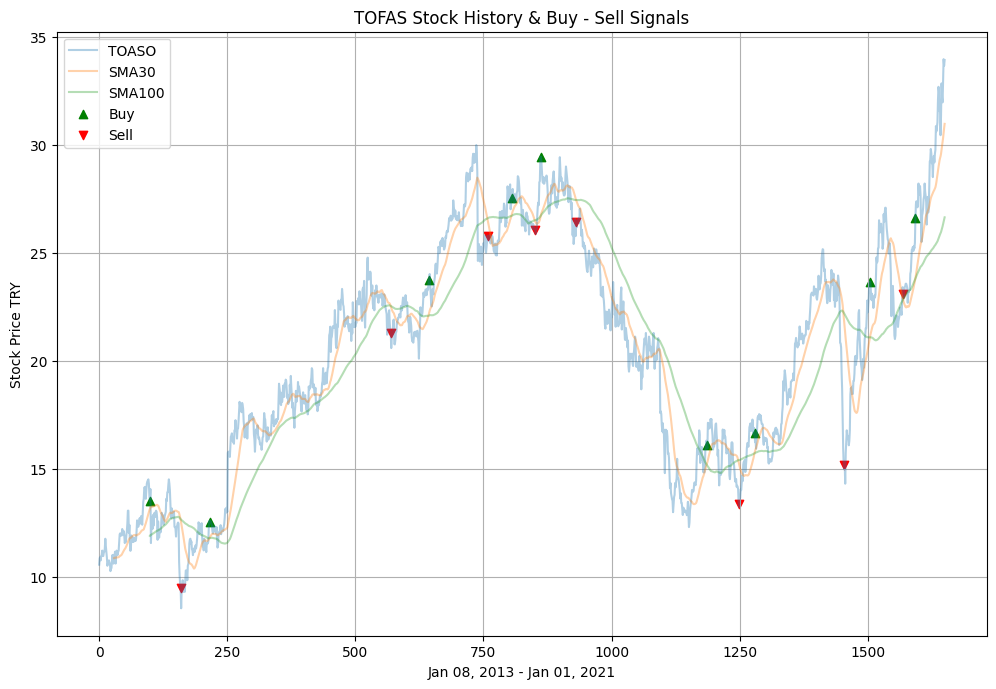

In [81]:
# VISUALIZE WHEN TO BUY WHEN TO SELL 

plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.grid()

plt.plot(mid_dataset['TOASO'], label = 'TOASO', alpha = 0.35)
plt.plot(mid_dataset['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(mid_dataset['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(mid_dataset.index , mid_dataset['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(mid_dataset.index , mid_dataset['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('TOFAS Stock History & Buy - Sell Signals')
plt.xlabel('Jan 08, 2013 - Jan 01, 2021')
plt.ylabel('Stock Price TRY')
plt.legend(loc = 'top left')
plt.show()
